In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

In [2]:
df=pd.read_csv('Model_data1.csv')
df

,Annual_Income,Total_EMI_per_month,Interest_Rate,Num_Credit_Inquiries,Payment_of_Min_Amount,Num_Credit_Card,Num_Bank_Accounts,Credit_History_Age,Num_of_Delayed_Payment,Num_of_Loan,Credit_Mix,Age,Output
0,46477.560,212.248190,24,12.0,1,10,7,110.000000,22.0,6,0,39,0
1,153147.640,81.918963,3,1.0,0,4,5,308.000000,14.0,1,0,52,0
2,16833.105,51.702938,4,6.0,0,5,5,232.000000,15.0,4,0,39,2
3,131693.370,208.858473,10,6.0,0,7,0,267.000000,3.0,3,0,31,1
4,22233.980,39.598024,3,2.0,0,6,5,352.000000,0.0,4,0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,7749555.000,51.878854,9,0.0,2,7,5,269.000000,20.0,1,1,35,1
63673,132753.520,268.916569,6,2.0,0,4,5,224.000000,9.0,3,0,18,1
63674,26265.810,46.662502,17,6.0,2,3,3,221.138208,19.0,4,0,32,1
63675,31407.100,115.206873,29,325.0,2,7,7,77.000000,25.0,8,0,39,0


In [4]:
from sklearn.model_selection import train_test_split
X=df.drop('Output',axis=1)
y=df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

In [5]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_dev= scaler.transform(X_dev)
X_test=scaler.transform(X_test)

In [6]:
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_dev)
baseline_accuracy = accuracy_score(y_dev, baseline_pred)
baseline_f1 = f1_score(y_dev, baseline_pred, average='weighted')
print("Baseline (Logistic Regression) Accuracy:", baseline_accuracy)
print("Baseline (Logistic Regression) F1 Score:", baseline_f1)

Baseline (Logistic Regression) Accuracy: 0.6053587201884385
Baseline (Logistic Regression) F1 Score: 0.5984716257821799


In [7]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    accuracy = accuracy_score(y_dev,y_pred)
    f1 = f1_score(y_dev, y_pred, average='weighted')
    print(f"{name} Accuracy:", accuracy)
    print(f"{name} F1 Score:", f1)

Random Forest Accuracy: 0.7748552360388654
Random Forest F1 Score: 0.774626849786277
K-Nearest Neighbors Accuracy: 0.6810285602119933
K-Nearest Neighbors F1 Score: 0.6793531936102309
Decision Tree Accuracy: 0.7006575718912553
Decision Tree F1 Score: 0.7006308800650741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 40752, number of used features: 12
[LightGBM] [Info] Start training from score -1.237966
[LightGBM] [Info] Start training from score -0.625366
[LightGBM] [Info] Start training from score -1.743194
LightGBM Accuracy: 0.7032093434095593
LightGBM F1 Score: 0.7046190145739151
XGBoost Accuracy: 0.7287270585925999
XGBoost F1 Score: 0.7285714473564455


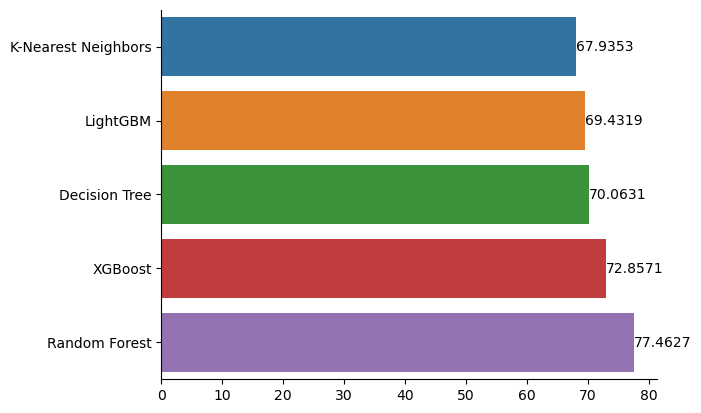

In [9]:
m = {
    "Random Forest": 0.774626849786277*100,
    "K-Nearest Neighbors": 0.6793531936102309*100,
    "Decision Tree": 0.7006308800650741*100,
    "LightGBM": 0.6943194664444743*100,
    "XGBoost": 0.7285714473564455*100
}
m= dict(sorted(m.items(), key=lambda item: item[1]))

ax=sns.barplot(y=list(m.keys()),x=list(m.values()))
sns.despine()
for i in ax.containers:
    ax.bar_label(i)

In [8]:
rf_classifier=RandomForestClassifier(random_state=1234)
rf_classifier.fit(X_train,y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy:", accuracy)
print(f"F1 Score:", f1)

Accuracy: 0.7686871859296482
F1 Score: 0.7684699837659393


## Final F1 Score: 0.7684699837659393